<a href="https://colab.research.google.com/github/rafaeldjsm/kmeans/blob/main/k_means_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import  pairwise_distances_argmin
from sklearn.metrics  import  pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rafaeldjsm/kmeans/main/kmeans3D.csv", decimal=",")
df

,X,Y,Z
0,45.266545,99.522791,41.223334
1,53.639226,71.686836,52.873719
2,75.925649,92.540494,39.802349
3,63.120502,82.552071,23.681828
4,98.635550,27.864215,37.009457
5,8.106829,16.943560,2.130184
6,5.916936,99.254673,40.132259
7,29.442962,22.919240,71.350621
8,61.001777,14.801513,47.848820
9,65.193161,81.121973,3.997767


# Padronização/Normalização da Base para a análise.

In [3]:
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit(df).transform(df),columns = df.columns)
df1

,X,Y,Z
0,-0.306507,1.357655,0.104020
1,0.001865,0.398853,0.534115
2,0.822692,1.117152,0.051562
3,0.351068,0.773103,-0.543556
4,1.659116,-1.110605,-0.051543
5,-1.675129,-1.486764,-1.339173
6,-1.755785,1.348420,0.063741
7,-0.889302,-1.280933,1.216222
8,0.273034,-1.560546,0.348612
9,0.427406,0.723844,-1.270228


In [4]:
def kmeans_1(n,df):
  '''
  Função para gerar clusters pelo método k-means
  n : Número de clusters
  '''
  df1 = df.copy()
  qtd_points , features = df1.shape
  df1['clusters'] = np.random.choice(n, qtd_points )
  centroid_lst = [] #lista de centroides

  for k in range(n):
    df1_centroide = df1[df1['clusters'] == k].iloc[:,:features].mean()
    centroid_lst.append(df1_centroide)
    df1['dc2_'+str(k)] = ((df1 - centroid_lst[0])**2).sum(axis=1)

  df1['Dist_min'] = df1.iloc[:,-n:].min(axis =1)

  df1['clusters_2'] = df1['clusters']

  for k in range(n):
    df1['clusters_2'] = np.where(df1['dc2_'+str(k)] == df1['Dist_min'],k,df1['clusters_2'])

  #Iterações para obter a convergência e definição dos clusters pelas distâncias aos centróides mais próximos
  w = 0
  df2 = df1.iloc[:,:features+1] #Definição do df2 para análise das mudanças a cada iteração
  df2.reset_index(inplace=True)
  df2['iteracao'] = 0

  df_centroide = pd.DataFrame(centroid_lst,index=['C0','C1']).reset_index()
  df_centroide['iteracao'] = 0
  df_centroide['clusters'] = np.arange(n)

  df2 = df2.append(df_centroide)

  for j in range(300):

    w = w+1
    centroid_lst = [] #lista de centroides
    for k in range(n):
      df1_centroide = df1[df1['clusters'] == k].iloc[:,:features].mean()
      centroid_lst.append(df1_centroide)
      df1['dc2_'+str(k)] = ((df1.iloc[:,:features] - centroid_lst[k])**2).sum(axis=1)

    df1['Dist_min'] = df1.iloc[:,features+1:-2].min(axis =1)

    for k in range(n):
      df1['clusters_2'] = np.where(df1['dc2_'+str(k)] == df1['Dist_min'],k,df1['clusters_2'])

    if not(df1['clusters'].equals(df1['clusters_2'])):
      df1['clusters'] = df1['clusters_2']
      df2_temp = df1.iloc[:,:features+1]
      df2_temp.reset_index(inplace=True)
      df2_temp['iteracao'] = j+1

      df_centroide_temp = pd.DataFrame(centroid_lst,index=['C0','C1']).reset_index()
      df_centroide_temp['iteracao'] = j+1
      df_centroide_temp['clusters'] = np.arange(n)

      df2_temp = df2_temp.append(df_centroide_temp)
      df2 = df2.append(df2_temp)
    else:
      break

  # w : Contador de iterações
  # df1 : Dataframe contendo a clusterização e as distancias aos centroides
  # centroid_lst : lista dos centroides

  return df1, w, centroid_lst, df2

In [5]:
df2, w, centroid_lst, df3 = kmeans_1(2,df1)

#Creating animation using plotly express
fig = px.scatter_3d(df3, x="X", y="Y",z="Z",
                    animation_frame="iteracao", 
                    animation_group="index",
                    color="clusters",
                    hover_name="index", 
                    size_max=100, range_x = [ min(df3['X'])*2, max(df3['X'])*2 ],
                                                 range_y = [ min(df3['Y'])*2,max(df3['Y'])*2 ],
                                                              width =1200, height = 800)
fig.show()

In [6]:
df2

,X,Y,Z,clusters,dc2_0,dc2_1,Dist_min,clusters_2
0,-0.306507,1.357655,0.104020,0,1.184136,7.092882,1.184136,0
1,0.001865,0.398853,0.534115,0,1.019899,2.464007,1.019899,0
2,0.822692,1.117152,0.051562,0,1.803280,5.579927,1.803280,0
3,0.351068,0.773103,-0.543556,0,0.446600,5.708452,0.446600,0
4,1.659116,-1.110605,-0.051543,1,6.030710,2.586776,2.586776,1
5,-1.675129,-1.486764,-1.339173,0,6.586334,10.694134,6.586334,0
6,-1.755785,1.348420,0.063741,0,3.494479,11.559031,3.494479,0
7,-0.889302,-1.280933,1.216222,1,6.157781,2.030546,2.030546,1
8,0.273034,-1.560546,0.348612,1,4.828259,0.867884,0.867884,1
9,0.427406,0.723844,-1.270228,0,1.167745,8.371497,1.167745,0


# Calculando a Inércia Obtida

In [7]:
(df2.Dist_min).sum()

39.82469696168226

In [8]:
from sklearn.metrics  import  pairwise_distances_argmin_min

In [9]:
(pairwise_distances_argmin_min(df1,centroid_lst)[1]**2).sum()

39.82469696168225

> Most well-tested implementations will do a bit more than this under the hood, but the preceding function gives the gist of the expectation–maximization approach.

>For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (***set by the n_init parameter, which defaults to 10***).

In [10]:
def kmeans_2(n,df):

    df4 = df.copy()

    qtd_points , features = df4.shape

    df4['clusters'] = np.random.choice(n, qtd_points)

    centroid_lst = [] #lista de centroides 
    for k in range(n):
        df4_centroide = df4[df4['clusters'] == k].iloc[:,:features].mean()
        centroid_lst.append(df4_centroide)

    while True:
        df4['new_clusters'] = pairwise_distances_argmin(df4.iloc[:,:features], centroid_lst)

        centroid_lst = [] #lista de centroides 
        for k in range(n):
            df4_centroide = df4[df4['new_clusters'] == k].iloc[:,:features].mean()
            centroid_lst.append(df4_centroide)

        if np.all(df4['clusters'] == df4['new_clusters']):
            break
        df4['clusters'] = df4['new_clusters']

    return centroid_lst, df4

In [11]:
centroid_lst, df4 = kmeans_2(2,df1)

In [12]:
(pairwise_distances_argmin_min(df1,centroid_lst)[1]**2).sum()

40.59565439472261

In [13]:
df4

,X,Y,Z,clusters,new_clusters
0,-0.306507,1.357655,0.104020,0,0
1,0.001865,0.398853,0.534115,0,0
2,0.822692,1.117152,0.051562,0,0
3,0.351068,0.773103,-0.543556,0,0
4,1.659116,-1.110605,-0.051543,1,1
5,-1.675129,-1.486764,-1.339173,1,1
6,-1.755785,1.348420,0.063741,0,0
7,-0.889302,-1.280933,1.216222,1,1
8,0.273034,-1.560546,0.348612,1,1
9,0.427406,0.723844,-1.270228,0,0


# Comparação com a biblioteca KMeans do sklearn.cluster

In [14]:
def run_kmeans(n,df):

    #
    kmeans = KMeans(n_clusters = n, init="k-means++",n_init = 500).fit(df)

    #
    centroids = kmeans.cluster_centers_

    #
    labels = pd.DataFrame(kmeans.labels_)

    inercia = kmeans.inertia_

    #
    labels = labels.rename(columns = {0:'cluster'})

    #
    df_cluster_analysis = pd.concat([labels, df], axis=1)

    df_cluster_analysis['cluster'] = df_cluster_analysis['cluster'].astype(int)
    
    return df_cluster_analysis, inercia

In [15]:
df5, inercia = run_kmeans(2,df1)
inercia

39.82469696168226

In [16]:
df5

,cluster,X,Y,Z
0,1,-0.306507,1.357655,0.104020
1,1,0.001865,0.398853,0.534115
2,1,0.822692,1.117152,0.051562
3,1,0.351068,0.773103,-0.543556
4,0,1.659116,-1.110605,-0.051543
5,1,-1.675129,-1.486764,-1.339173
6,1,-1.755785,1.348420,0.063741
7,0,-0.889302,-1.280933,1.216222
8,0,0.273034,-1.560546,0.348612
9,1,0.427406,0.723844,-1.270228


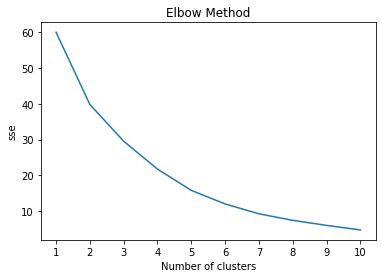

In [17]:
kmeans_kwargs = {
"init": "k-means++",
"n_init": 500,
"max_iter": 300}


# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

In [18]:
n = 2
sse[n-1]

39.82469696168226

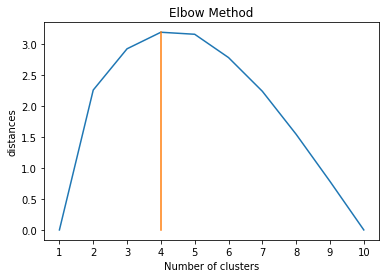

In [19]:
def optimal_number_of_clusters(sse):
    x1, y1 = 1, sse[0]
    x2, y2 = 10, sse[len(sse)-1]

    distances = []
    for i in range(len(sse)):
        x0 = i+1
        y0 = sse[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances

distances = optimal_number_of_clusters(sse)
n_max_dist = distances.index(max(distances)) + 1
  
plt.plot(range(1, 11), distances)
plt.plot([n_max_dist,n_max_dist],[0,max(distances)])
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distances')
plt.show()

In [20]:
def silhouette_plot(X, cluster_labels, ax=None):
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    inliers = cluster_labels != -1
    X = X[inliers]
    cluster_labels = cluster_labels[inliers]
    silhouette_scores = silhouette_scores[inliers]
    labels = np.unique(cluster_labels)
    cm = plt.cm.tab10 if len(labels) <= 10 else plt.cm.tab20
    for i in labels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            silhouette_scores[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 1  # 1 for the 0 samples

    sil_coeff = silhouette_scores.mean()
    print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=sil_coeff, color="red", linestyle="--")

    return ax, sil_coeff

For n_clusters=2, Silhouette Coefficient = 0.3081417460980978
For n_clusters=3, Silhouette Coefficient = 0.32202646056549
For n_clusters=4, Silhouette Coefficient = 0.32789450722987107
For n_clusters=5, Silhouette Coefficient = 0.350636621771733
For n_clusters=6, Silhouette Coefficient = 0.3150583277273562


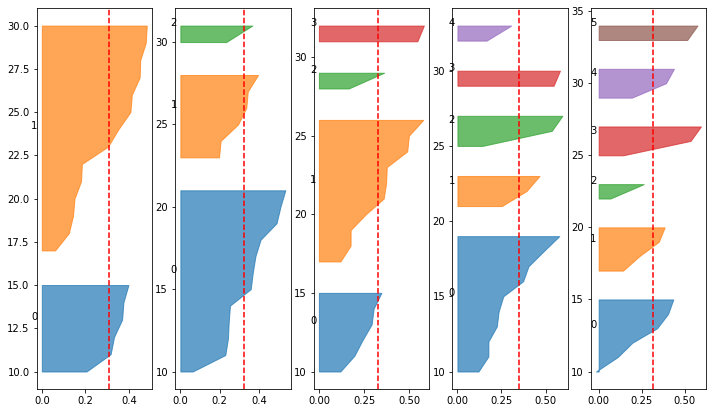

In [21]:
sil_coeffecients = []

fig, axes = plt.subplots(1, 5, figsize=(12, 7))

for ax,n_cluster in zip(axes.T,range(2,7)):
    kmeans = KMeans(n_clusters = n_cluster, **kmeans_kwargs).fit(df1)
    label = kmeans.labels_

    ax2, silhuete_coef = silhouette_plot(df1,label, ax=ax)
    sil_coeffecients.append(silhuete_coef)

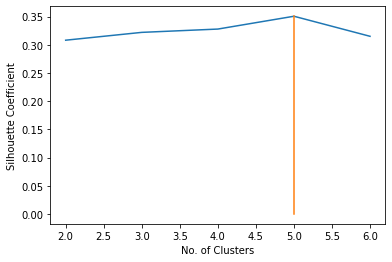

In [22]:
n_sil_coeffecients =  sil_coeffecients.index(max(sil_coeffecients)) + 2

plt.plot(range(2,7), sil_coeffecients)
plt.plot([n_sil_coeffecients,n_sil_coeffecients],[0,max(sil_coeffecients)])
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0db5eb7f50>,
                     model=None)

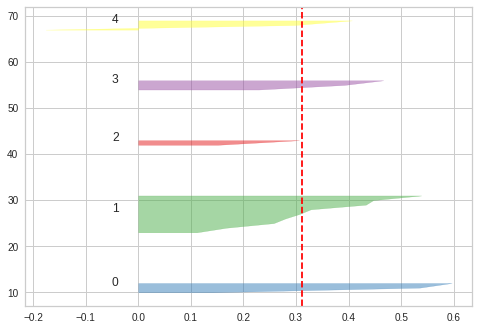

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_sil_coeffecients),**kmeans_kwargs, colors='yellowbrick')
visualizer.fit(df1)        # Fit the data to the visualizer
visualizer

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [25]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [27]:
kmeans.cluster_centers_[0] # O primeiro centroide encontrado

array([ 0.00000000e+00, -9.99200722e-16,  3.07228916e-01,  7.16265060e+00,
        1.19457831e+01,  1.93373494e+00,  1.50602410e-01,  5.42168675e-02,
       -2.25514052e-17,  1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
        8.46385542e+00,  1.53012048e+00,  9.75903614e-01,  2.77108434e-01,
       -1.12757026e-17,  6.44578313e-01,  1.07108434e+01,  1.15602410e+01,
        4.33734940e+00,  5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
        6.02409639e-03,  4.75903614e+00,  1.47590361e+01,  5.86144578e+00,
        6.87951807e+00,  1.07530120e+01,  6.21686747e+00,  1.80722892e-02,
        0.00000000e+00,  8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
        1.28132530e+01,  1.43915663e+01,  5.48192771e+00,  0.00000000e+00,
        9.63855422e-02,  6.50602410e+00,  1.16867470e+01,  1.23433735e+01,
        1.48373494e+01,  1.07590361e+01,  1.56626506e+00, -4.16333634e-17,
        6.02409639e-02,  1.11445783e+00,  3.00000000e+00,  7.77710843e+00,
        1.40843373e+01,  

In [29]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0db1052110>,
      dtype=object)

In [31]:
for k in ax.flat:
    print(k)

AxesSubplot(0.125,0.536818;0.133621x0.343182)
AxesSubplot(0.285345,0.536818;0.133621x0.343182)
AxesSubplot(0.44569,0.536818;0.133621x0.343182)
AxesSubplot(0.606034,0.536818;0.133621x0.343182)
AxesSubplot(0.766379,0.536818;0.133621x0.343182)
AxesSubplot(0.125,0.125;0.133621x0.343182)
AxesSubplot(0.285345,0.125;0.133621x0.343182)
AxesSubplot(0.44569,0.125;0.133621x0.343182)
AxesSubplot(0.606034,0.125;0.133621x0.343182)
AxesSubplot(0.766379,0.125;0.133621x0.343182)


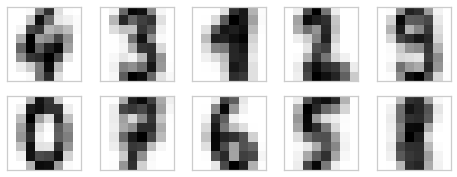

In [39]:
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [71]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] # Como nem sempre as definicções dos centros tem a mesma ordem, o programa agrupa qual tem melhor correposndencia para comparar.

In [46]:
clusters # Array que indica a qual cluster cada elemento pertence segundo o indice dos dados de entrada, ou seja o vetor data[1] pertence ao cluster[1] (ou label)

array([5, 9, 9, ..., 9, 4, 4], dtype=int32)

In [73]:
labels # O mesmo array dos "clusters" organizado pela maior correspondência

array([0, 8, 8, ..., 8, 9, 9], dtype=int32)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

In [77]:
len(digits.target[digits.target == labels])/len(digits.target) # Como é cálculado a acurácia

0.7952142459654981

In [57]:
digits.target[mask]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

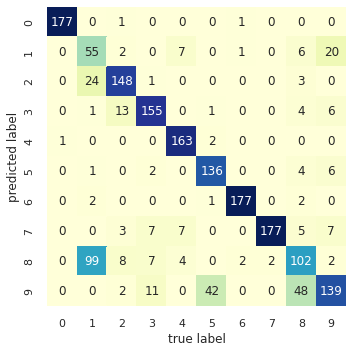

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# sns.set()  # for plot styling
sns.set_style("whitegrid")

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label');

In [96]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

In [98]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [97]:
digits_proj

array([[ 7.5666435e+01,  6.4290322e-02],
       [ 3.8889093e+00, -1.4375434e+01],
       [ 2.6151240e+00,  1.3298235e+01],
       ...,
       [-6.2713938e+00,  5.5737371e+00],
       [-3.2499161e+01,  2.5235760e+01],
       [-9.0447884e+00,  1.1736705e+01]], dtype=float32)

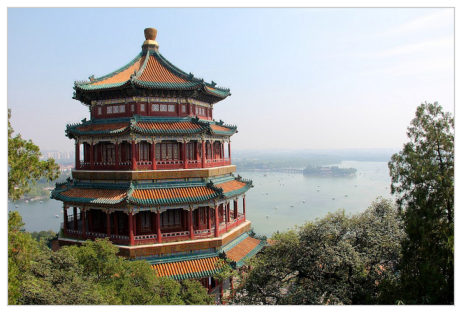

In [178]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [179]:
china.shape

(427, 640, 3)

In [183]:
china[0][0] #RGB

array([174, 201, 231], dtype=uint8)

In [184]:
data = china/ 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [185]:
rng = np.random.RandomState(0)
rng.permutation(data.shape[0])

array([101521, 233130, 175683, ..., 122579, 152315, 117952])

In [186]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [187]:
new_colors

array([[0.74994553, 0.83951525, 0.94109477],
       [0.74994553, 0.83951525, 0.94109477],
       [0.74994553, 0.83951525, 0.94109477],
       ...,
       [0.19784134, 0.19424357, 0.13966541],
       [0.04984681, 0.04175858, 0.02037377],
       [0.04984681, 0.04175858, 0.02037377]])

In [188]:
kmeans.predict(data) # Labels indicando a qual cluster pertencem

array([5, 5, 5, ..., 1, 4, 4], dtype=int32)

In [189]:
kmeans.cluster_centers_

array([[0.87115494, 0.91664967, 0.96656466],
       [0.19784134, 0.19424357, 0.13966541],
       [0.56890756, 0.59369748, 0.53893557],
       [0.63707665, 0.34795009, 0.27397504],
       [0.04984681, 0.04175858, 0.02037377],
       [0.74994553, 0.83951525, 0.94109477],
       [0.8516934 , 0.58253119, 0.41907308],
       [0.28932039, 0.29027223, 0.23266705],
       [0.40294118, 0.16089325, 0.10348584],
       [0.68104575, 0.71459695, 0.70746187],
       [0.12624041, 0.11007673, 0.08627451],
       [0.40254256, 0.37914243, 0.21684982],
       [0.7841402 , 0.81492278, 0.83310776],
       [0.47062866, 0.47543966, 0.37679402],
       [0.8962963 , 0.7254902 , 0.60174292],
       [0.95014006, 0.96328665, 0.98590103]])

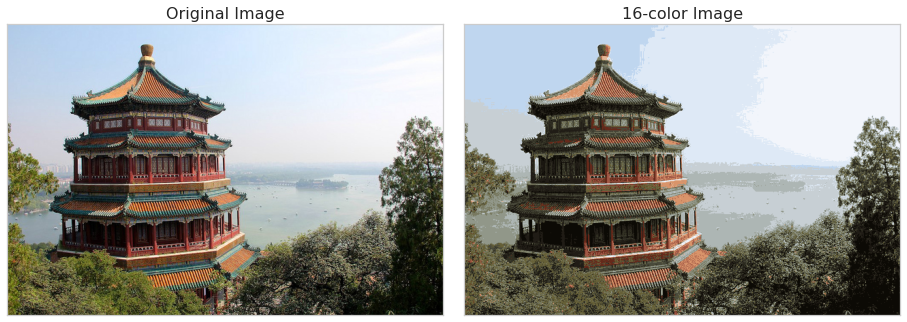

In [191]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

### Referências:

* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
* https://refactored.ai/microcourse/notebook?path=content%2F07-Unsupervised_Models%2F02-K-means_Clustering%2Fadvanced-k-means.ipynb
* <https://www.cms.waikato.ac.nz/~abifet/book/chapter_9.html>
* <https://www.kdnuggets.com/2019/05/guide-k-means-clustering-algorithm.html>
* <https://medium.com/neuronio-br/aprendizado-n%C3%A3o-supervisionado-com-k-means-f4272dee98a0>
* <https://www.devmedia.com.br/data-mining-na-pratica-algoritmo-k-means/4584>
* <https://lamfo-unb.github.io/2017/10/05/Introducao_basica_a_clusterizacao/>
* <https://minerandodados.com.br/entenda-o-algoritmo-k-means/>
* <https://fabiobaldini.com.br/machine-learning-k-means-no-ms-excel-2/>
* https://realpython.com/k-means-clustering-python/
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#:~:text=Evaluate%20the%20ability%20of%20k,to%20the%20nearest%20cluster%20center).